In [50]:
import pandas as pd
import numpy as np
from statsmodels.sandbox.stats.multicomp import multipletests 
data = pd.read_csv('ab_browser_test.csv', sep=',')
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [3]:
exp_group = np.sum(data.ix[data['slot']=='exp', 'n_clicks' ])
ctrl_group = np.sum(data.ix[data['slot']=='control', 'n_clicks' ])

In [4]:
100*(exp_group-ctrl_group)/float(ctrl_group)

1.6135689824415806

In [5]:
exp_mean = data.ix[data['slot']=='exp', 'n_clicks' ].mean()
exp_std = data.ix[data['slot']=='control', 'n_clicks' ].std(ddof=1)/np.sqrt(data.shape[0])

In [6]:
len(data)

566134

In [7]:
exp_group =  data[data['slot']=='exp'].n_clicks.values
ctrl_group = data[data['slot']=='control'].n_clicks.values

def get_bootstrap_samples(data1, n_samples):
    indices = np.random.randint(0, len(data1), (n_samples, len(data1)))
    print len(indices[0])
    samples = data1[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

np.random.seed(0)
exp_mean_scores = map(np.mean, get_bootstrap_samples(exp_group, 1000))
ctrl_mean_scores = map(np.mean, get_bootstrap_samples(ctrl_group, 1000))

exp_median_scores = map(np.median, get_bootstrap_samples(exp_group, 1000))
ctrl_median_scores = map(np.median, get_bootstrap_samples(ctrl_group, 1000))

print "95% confidence interval for the experimental median group:",  stat_intervals(exp_median_scores, 0.05)
print "95% confidence interval for the control median group:",  stat_intervals(ctrl_median_scores, 0.05)
print "95% confidence interval for the experimental mean group:",  stat_intervals(exp_mean_scores, 0.05)
print "95% confidence interval for the control mean group:",  stat_intervals(ctrl_mean_scores, 0.05)

281580
284554
281580
284554
95% confidence interval for the experimental median group: [ 5.  5.]
95% confidence interval for the control median group: [ 4.  4.]
95% confidence interval for the experimental mean group: [ 11.5086867   11.66089388]
95% confidence interval for the control mean group: [ 11.20795095  11.35742732]


In [8]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(exp_median_scores, ctrl_median_scores))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [-1. -1.]


In [9]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(exp_mean_scores, ctrl_mean_scores))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [-0.40475697 -0.19172563]


In [10]:
exp_mean_scores = map(np.mean, get_bootstrap_samples(exp_group, 500))
ctrl_mean_scores = map(np.mean, get_bootstrap_samples(ctrl_group, 500))

281580
284554


In [11]:
ctrl_var_sum = map(np.std, get_bootstrap_samples(ctrl_group, 500))

284554


Populating the interactive namespace from numpy and matplotlib


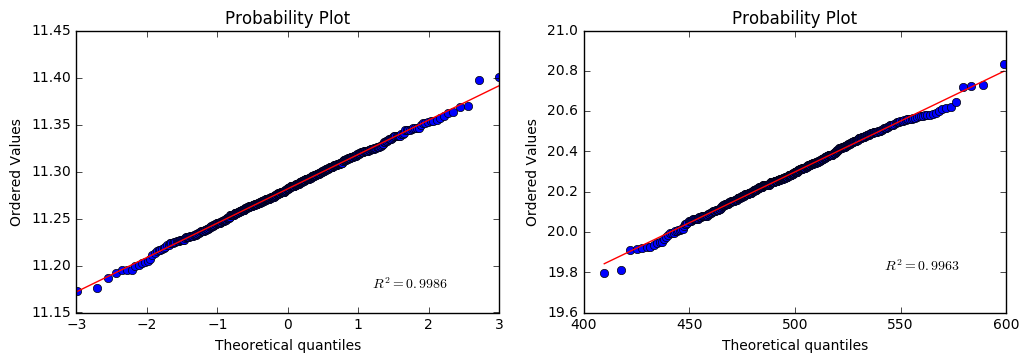

In [12]:
%pylab inline
np.random.seed(0)
from statsmodels.stats.weightstats import *
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(ctrl_mean_scores, dist="norm", plot=pylab, rvalue=True)
pylab.subplot(2,2,2)
stats.probplot(ctrl_var_sum, dist="chi2", sparams = (len(ctrl_var_sum)-1), plot=pylab,rvalue=True)
pylab.show()

Применение критерия Манна-Уитни

In [20]:
ctrl_clcks = data[data['slot']=='control'].groupby(['userID'], sort=False).sum().n_clicks.values
exp_clcks = data[data['slot']=='exp'].groupby(['userID'], sort=False).sum().n_clicks.values

In [21]:
stats.mannwhitneyu(ctrl_clcks, exp_clcks)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

Нахождение наиболее значимых отличий между пользователями разных браузеров

In [25]:
ctrl_group1 = data[data['slot']=='control']

array(['Browser #4', 'Browser #14', 'Browser #2', 'Browser #20',
       'Browser #22', 'Browser #17'], dtype=object)

In [57]:
ctrl_group1 = data[data['slot']=='control']
exp_group1 = data[data['slot']=='exp']
hypothesis = []
for browser_name in data['browser'].unique():
    ctrl_browser_group = ctrl_group1[ctrl_group1['browser']==browser_name].n_clicks.values
    exp_browser_group = exp_group1[exp_group1['browser']==browser_name].n_clicks.values
    hypothesis.append(stats.mannwhitneyu(ctrl_browser_group, exp_browser_group).pvalue)
print hypothesis    
reject, p_corrected, a1, a2 = multipletests(hypothesis, 
                                            alpha = 0.05, 
                                            method = 'holm') 

[0.027243860419724101, 0.40760617658454984, 0.0, 0.037400601430108017, 0.45366656388735377, 0.25740551522100319]


In [52]:
print hypothesis

[0.027243860419724101, 0.40760617658454984, 0.0, 0.037400601430108017, 0.45366656388735377, 0.25740551522100319]


In [58]:
print reject

[False False  True False False False]


Доля не клинутых запросов для каждой из групп

In [64]:
for browser_name in data['browser'].unique():
    ctrl_browser_group1 = ctrl_group1[ctrl_group1['browser']==browser_name]
    exp_browser_group1 = exp_group1[exp_group1['browser']==browser_name]
    print browser_name
    print 100*ctrl_browser_group1['n_nonclk_queries'].sum()/float(ctrl_browser_group1['n_queries'].sum())
    print 100*exp_browser_group1['n_nonclk_queries'].sum()/float(exp_browser_group1['n_queries'].sum())

Browser #2
45.9627471792
44.9827469486
Browser #4
46.9709296351
45.1429419036
Browser #14
57.5904113601
43.7556173613
Browser #17
36.2993667463
36.9374128487
Browser #20
40.5404847434
38.9773764837
Browser #22
40.5939765935
39.8539472197
